In [64]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
import time
from tqdm import tqdm_notebook as tqdm

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import dates
from datetime import datetime
 
from matplotlib.ticker import MultipleLocator, IndexLocator, FuncFormatter
from matplotlib.dates import MonthLocator, DateFormatter


from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = 'C:\Windows\Fonts\malgun.ttf').get_name()
rc('font',family=font_name)

import warnings
warnings.filterwarnings('ignore')


In [23]:
a = pd.read_csv('향수검색(2017~2018).csv')
a1 = pd.read_csv('향수검색(2018~2019).csv')
a2 = pd.read_csv('향수검색(2019~2020).csv')
a3 = pd.read_csv('향수검색(2020~2021).csv')
a4 = pd.read_csv('향수검색(2021~2022).csv')
a5 = pd.read_csv('향수검색(2022).csv')

In [24]:
a.iloc[-1,:], a1.iloc[0,:]

(날짜    2018-01-01
 향수            68
 Name: 96, dtype: object,
 날짜    2018-01-01
 향수            40
 Name: 0, dtype: object)

In [25]:
a1.향수 = (a1.향수 * 68) / 40
a1

,날짜,향수
0,2018-01-01,68.0
1,2018-01-02,71.4
2,2018-01-03,68.0
3,2018-01-04,62.9
4,2018-01-05,61.2
...,...,...
361,2018-12-28,95.2
362,2018-12-29,88.4
363,2018-12-30,91.8
364,2018-12-31,93.5


In [26]:
a1.iloc[-1,:],a2.iloc[0,:]

(날짜    2019-01-01
 향수          98.6
 Name: 365, dtype: object,
 날짜    2019-01-01
 향수            51
 Name: 0, dtype: object)

In [27]:
a2.향수 = (a2.향수 * 98.6) / 51
a2

,날짜,향수
0,2019-01-01,98.600000
1,2019-01-02,104.400000
2,2019-01-03,123.733333
3,2019-01-04,104.400000
4,2019-01-05,119.866667
...,...,...
361,2019-12-28,96.666667
362,2019-12-29,112.133333
363,2019-12-30,98.600000
364,2019-12-31,88.933333


In [28]:
a2.iloc[-1,:],a3.iloc[0,:]

(날짜    2020-01-01
 향수    100.533333
 Name: 365, dtype: object,
 날짜    2020-01-01
 향수            46
 Name: 0, dtype: object)

In [29]:
a3.향수 = (a3.향수 * 100.533333) / 46
a3

,날짜,향수
0,2020-01-01,100.533333
1,2020-01-02,111.460869
2,2020-01-03,109.275362
3,2020-01-04,107.089855
4,2020-01-05,124.573913
...,...,...
362,2020-12-28,187.953623
363,2020-12-29,170.469565
364,2020-12-30,205.437680
365,2020-12-31,144.243478


In [30]:
a3.iloc[-1,:],a4.iloc[0,:]

(날짜    2021-01-01
 향수    159.542028
 Name: 366, dtype: object,
 날짜    2021-01-01
 향수            58
 Name: 0, dtype: object)

In [31]:
a4.향수 = (a4.향수 * 159.542028) / 58
a4

,날짜,향수
0,2021-01-01,159.542028
1,2021-01-02,165.043477
2,2021-01-03,187.049274
3,2021-01-04,192.550723
4,2021-01-05,184.298550
...,...,...
361,2021-12-28,176.046376
362,2021-12-29,209.055071
363,2021-12-30,165.043477
364,2021-12-31,159.542028


In [32]:
a4.iloc[-1,:],a5.iloc[0,:]

(날짜    2022-01-01
 향수    154.040579
 Name: 365, dtype: object,
 날짜    2022-01-01
 향수            54
 Name: 0, dtype: object)

In [33]:
a5.향수 = (a5.향수 * 154.040579) / 54
a5

,날짜,향수
0,2022-01-01,154.040579
1,2022-01-02,213.945249
2,2022-01-03,199.682232
3,2022-01-04,222.503059
4,2022-01-05,191.124422
...,...,...
265,2022-09-23,122.661943
266,2022-09-24,136.924959
267,2022-09-25,142.630166
268,2022-09-26,193.977025


In [34]:
sum_click = pd.concat([a,a1,a2,a3,a4,a5],axis=0,ignore_index=True)
sum_click
sum_click.to_csv('향수검색')

In [35]:
sum_click

,날짜,향수
0,2017-09-27,51.000000
1,2017-09-28,35.000000
2,2017-09-29,45.000000
3,2017-09-30,43.000000
4,2017-10-01,45.000000
...,...,...
1827,2022-09-23,122.661943
1828,2022-09-24,136.924959
1829,2022-09-25,142.630166
1830,2022-09-26,193.977025


In [48]:
sum_click['datetime'] = pd.to_datetime(sum_click['날짜'])
sum_click

,날짜,향수,datetime
0,2017-09-27,51.000000,2017-09-27
1,2017-09-28,35.000000,2017-09-28
2,2017-09-29,45.000000,2017-09-29
3,2017-09-30,43.000000,2017-09-30
4,2017-10-01,45.000000,2017-10-01
...,...,...,...
1827,2022-09-23,122.661943,2022-09-23
1828,2022-09-24,136.924959,2022-09-24
1829,2022-09-25,142.630166,2022-09-25
1830,2022-09-26,193.977025,2022-09-26


In [53]:
sum_click.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1832 entries, 0 to 1831
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   날짜        1832 non-null   object        
 1   향수        1832 non-null   float64       
 2   datetime  1832 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 43.1+ KB


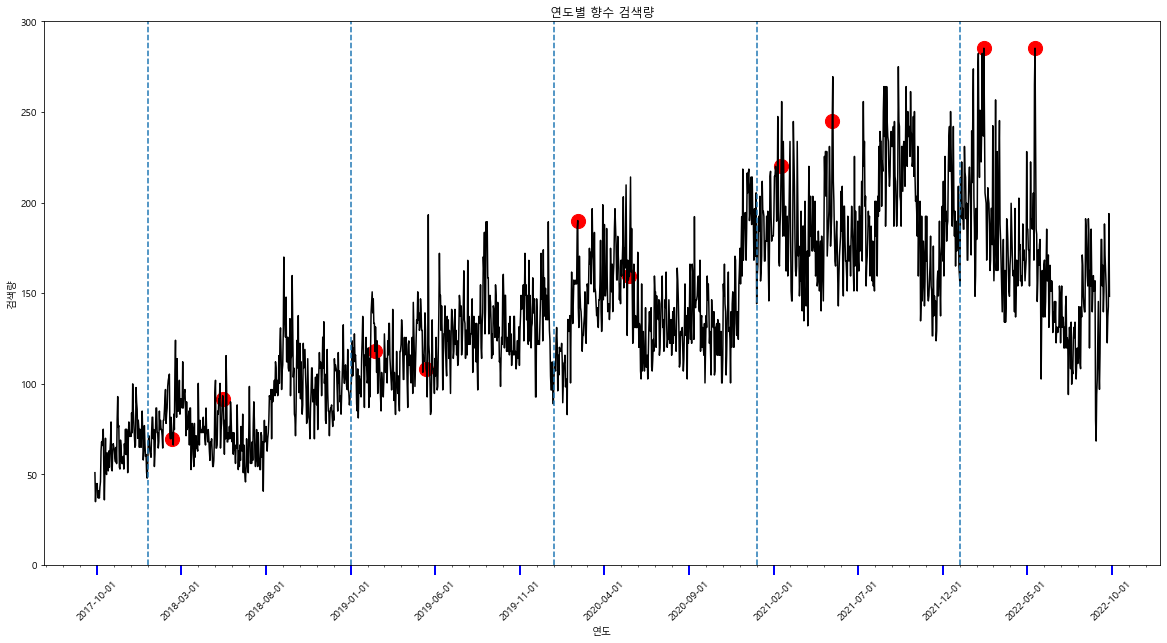

<Figure size 432x288 with 0 Axes>

In [115]:
# date = pd.date_range(start='2017-09-27', end='2022-09-27', freq='MS') ## M 뒤에 S를 붙이면 월초가 출력된다.
# y = abs(10*np.random.randn(len(date))+1)
# y = y/max(y)

fig = plt.figure(figsize=(20,10))
fig.set_facecolor('white')
ax = fig.add_subplot()
ax.plot(sum_click["datetime"], sum_click["향수"],color='k')

ax.xaxis.set_major_locator(MonthLocator(interval=5)) ## 5개월마다 메인 눈금을 표시한다.
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d')) ## 날짜 표시 형식
ax.xaxis.set_minor_locator(MonthLocator(interval=1)) ## 1개월마다 서브 눈금을 표시한다.
 
ax.tick_params(axis='x',which='major',length=10,width=2,color='b')

plt.scatter(['2022-02-13'],[sum_click[sum_click['datetime'] == '2022-02-13']["향수"]], c='red', s=200)
plt.scatter(['2022-05-16'],[sum_click[sum_click['datetime'] == '2022-05-16']["향수"]], c='red', s=200)
plt.scatter(['2021-02-13'],[sum_click[sum_click['datetime'] == '2021-02-13']["향수"]], c='red', s=200)
plt.scatter(['2021-05-16'],[sum_click[sum_click['datetime'] == '2021-05-16']["향수"]], c='red', s=200)
plt.scatter(['2020-02-13'],[sum_click[sum_click['datetime'] == '2020-02-13']["향수"]], c='red', s=200)
plt.scatter(['2020-05-16'],[sum_click[sum_click['datetime'] == '2020-05-16']["향수"]], c='red', s=200)
plt.scatter(['2019-02-13'],[sum_click[sum_click['datetime'] == '2019-02-13']["향수"]], c='red', s=200)
plt.scatter(['2019-05-16'],[sum_click[sum_click['datetime'] == '2019-05-16']["향수"]], c='red', s=200)
plt.scatter(['2018-02-13'],[sum_click[sum_click['datetime'] == '2018-02-13']["향수"]], c='red', s=200)
plt.scatter(['2018-05-16'],[sum_click[sum_click['datetime'] == '2018-05-16']["향수"]], c='red', s=200)

plt.axvline(x = datetime(2018,1,1), linestyle='--')
plt.axvline(x = datetime(2019,1,1), linestyle='--')
plt.axvline(x = datetime(2020,1,1), linestyle='--')
plt.axvline(x = datetime(2021,1,1), linestyle='--')
plt.axvline(x = datetime(2022,1,1), linestyle='--')

plt.title('연도별 향수 검색량')
plt.xlabel('연도')
plt.ylabel('검색량')
plt.xticks(rotation=45)
plt.ylim(0,300)
# plt.xscale(sum_click["날짜"],'linear')
# plt.xlim(['2017-09-27','2022-09-27'])
 
plt.show()
plt.savefig('향수검색량.png')

In [ ]:
# plt.figure(figsize=(20,10))
# plt.plot(sum_click["날짜"], sum_click["향수"])

# plt.scatter(['2022-02-13'],[sum_click[sum_click['날짜'] == '2022-02-13']["향수"]], c='red')
# plt.scatter(['2022-05-16'],[sum_click[sum_click['날짜'] == '2022-05-16']["향수"]], c='red')
# plt.scatter(['2021-02-13'],[sum_click[sum_click['날짜'] == '2021-02-13']["향수"]], c='red')
# plt.scatter(['2021-05-16'],[sum_click[sum_click['날짜'] == '2021-05-16']["향수"]], c='red')
# plt.scatter(['2020-02-13'],[sum_click[sum_click['날짜'] == '2020-02-13']["향수"]], c='red')
# plt.scatter(['2020-05-16'],[sum_click[sum_click['날짜'] == '2020-05-16']["향수"]], c='red')
# plt.scatter(['2019-02-13'],[sum_click[sum_click['날짜'] == '2019-02-13']["향수"]], c='red')
# plt.scatter(['2019-05-16'],[sum_click[sum_click['날짜'] == '2019-05-16']["향수"]], c='red')
# plt.scatter(['2018-02-13'],[sum_click[sum_click['날짜'] == '2018-02-13']["향수"]], c='red')
# plt.scatter(['2018-05-16'],[sum_click[sum_click['날짜'] == '2018-05-16']["향수"]], c='red')

# plt.axvline('2018-01-01',linestyle='--')
# plt.axvline('2019-01-01',linestyle='--')
# plt.axvline('2020-01-01',linestyle='--')
# plt.axvline('2021-01-01',linestyle='--')
# plt.axvline('2022-01-01',linestyle='--')

# plt.xticks(rotation=90)
# plt.xlim()
# plt.show()

In [284]:
trend1 = pd.read_csv('향수검색량1.csv',encoding='utf-8')
trend1.head()

,날짜,향수
0,2021-09-27,80
1,2021-09-28,78
2,2021-09-29,88
3,2021-09-30,83
4,2021-10-01,84


<Figure size 1440x720 with 0 Axes>

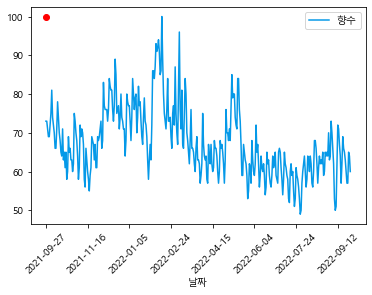

In [54]:
plt.figure(figsize=(20,10))
trend1.plot(x='날짜',y='향수',c='#0599e8')
plt.xticks(rotation=45)
plt.scatter(['2022-02-13'],[trend1[trend1['날짜'] == '2022-02-13']["향수"]], c='red')
plt.show()

In [58]:
type(trend1["날짜"][0])

str

In [ ]:
trend1.loc[trend1['날짜'] == '2022-02-13']['날짜']

In [70]:
trend = pd.read_csv('2017-2018.csv',encoding='utf-8')
trend1 = pd.read_csv('2018-2019.csv',encoding='utf-8')
trend2 = pd.read_csv('2019-2020.csv',encoding='utf-8')
trend3 = pd.read_csv('2020-2021.csv',encoding='utf-8')
trend4 = pd.read_csv('2021-2022.csv',encoding='utf-8')
trend.head()

,날짜,향수
0,2017-09-27,30
1,2017-09-28,20
2,2017-09-29,26
3,2017-09-30,25
4,2017-10-01,26


In [74]:
trend_total = pd.concat([trend,trend1,trend2,trend3,trend4])
trend_total['날짜']=trend_total.날짜.str[:4]
trend_total

,날짜,향수
0,2017,30
1,2017,20
2,2017,26
3,2017,25
4,2017,26
...,...,...
361,2022,43
362,2022,48
363,2022,50
364,2022,68


In [104]:
trend_2017 = pd.Series(trend_total[trend_total['날짜'] == '2017']['향수'].sum())
trend_2018 = pd.Series(trend_total[trend_total['날짜'] == '2018']['향수'].sum())
trend_2019 = pd.Series(trend_total[trend_total['날짜'] == '2019']['향수'].sum())
trend_2020 = pd.Series(trend_total[trend_total['날짜'] == '2020']['향수'].sum())
trend_2021 = pd.Series(trend_total[trend_total['날짜'] == '2021']['향수'].sum())
trend_2022 = pd.Series(trend_total[trend_total['날짜'] == '2022']['향수'].sum())
trend_every = pd.DataFrame({'2017':trend_2017,'2018':trend_2018,'2019':trend_2019,'2020':trend_2020,'2021':trend_2021,'2021':trend_2022})
trend_every

,2017,2018,2019,2020,2021
0,3579,17811,22879,23026,15814


In [211]:
trend_every.values

array([[ 3579, 17811, 22879, 23026, 15814]], dtype=int64)

In [216]:
t = trend_every.T
t.columns = ['검색량']
t

,검색량
2017,3579
2018,17811
2019,22879
2020,23026
2021,15814


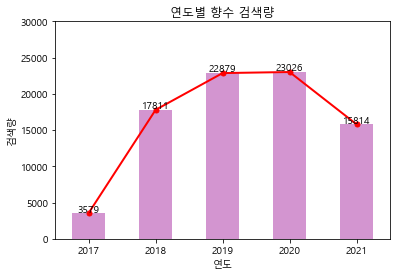

<Figure size 432x288 with 0 Axes>

In [269]:
t = trend_every.T
t.columns = ['검색량']
t

temp = t['검색량']
y = temp[['2017','2018','2019','2020','2021']]
y

ax = t.plot(kind='bar',legend=None, color='#d395d0')
# #'#ffc000', '#8fd9b6', '#d395d0', 0599e8

plt.plot(y, c='r', marker = 'o', ls='-', lw = 2, ms = 5, mfc = 'r', mew = 1, mec = 'r')

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%d"%height, (left+width/2, height*1.01), ha='center')

plt.xticks(rotation=0)
plt.ylim(0,30000)
plt.xlabel('연도')
plt.ylabel('검색량')
plt.title('연도별 향수 검색량')
plt.show()
plt.savefig('향수검색량(네이버).png')

In [236]:
money1 = pd.read_csv('화장품과향수 수출입.csv',encoding='cp949')
money1.head()

,품목별,항목,단위,2020.01 월,2020.02 월,2020.03 월,2020.04 월,2020.05 월,2020.06 월,2020.07 월,...,2021.09 월,2021.10 월,2021.11 월,2021.12 월,2022.01 월,2022.02 월,2022.03 월,2022.04 월,2022.05 월,2022.06 월
0,총액,수출액[천달러],천달러,43103061.0,40911819.0,46167204.0,36270183.0,34854511.0,39214071.0,42785144.0,...,55913862.0,55660373.0,60330542.0,60734117.0,55460865.0,54154313.0,63785078.0,57849157.0,61579891.0,57625856.0
1,총액,수입액[천달러],천달러,42718100.0,36977247.0,41803860.0,37932611.0,34661974.0,35794860.0,38849185.0,...,51636341.0,53847824.0,57357549.0,61159671.0,60363481.0,53133762.0,63593038.0,60326206.0,63194249.0,60200435.0
2,식품 및 산동물,수출액[천달러],천달러,464273.0,468124.0,545261.0,545869.0,460918.0,531000.0,542869.0,...,602458.0,690808.0,744879.0,786504.0,626650.0,611226.0,714919.0,724140.0,710015.0,662101.0
3,식품 및 산동물,수입액[천달러],천달러,2627428.0,2005395.0,2262352.0,2304002.0,2379665.0,2301011.0,2413044.0,...,2641506.0,2754248.0,3021359.0,3096336.0,3038687.0,2623332.0,3376922.0,3248464.0,3261850.0,2977361.0
4,중분류 03의 동물을 제외한 산 동물,수출액[천달러],천달러,190.0,398.0,181.0,120.0,195.0,387.0,443.0,...,587.0,711.0,827.0,615.0,612.0,530.0,775.0,548.0,729.0,590.0


In [ ]:
money1.index.str.contains('향수')

In [246]:
money = pd.read_csv('화장품과향수_수출입_1.csv',encoding='utf-8',index_col='품목별')
money

,항목,단위,2020.01 월,2020.02 월,2020.03 월,2020.04 월,2020.05 월,2020.06 월,2020.07 월,2020.08 월,...,2021.09 월,2021.10 월,2021.11 월,2021.12 월,2022.01 월,2022.02 월,2022.03 월,2022.04 월,2022.05 월,2022.06 월
품목별,,,,,,,,,,,,,,,,,,,,,
"향수 및 화장품,화장용품(비누제외)",수출액[천달러],천달러,457396,511342,751075,549864,550866,540095,581815,564114,...,852136,781467,856152,671517,553822,559575,693407,696093,821203,646052
"향수 및 화장품,화장용품(비누제외)",수입액[천달러],천달러,145211,134051,131773,122813,106444,121283,127440,123310,...,135540,142346,137730,156103,135690,140972,158256,149163,141925,151026


In [247]:
money.T.iloc[2:,:].index.str[:7]

Index(['2020.01', '2020.02', '2020.03', '2020.04', '2020.05', '2020.06',
       '2020.07', '2020.08', '2020.09', '2020.10', '2020.11', '2020.12',
       '2021.01', '2021.02', '2021.03', '2021.04', '2021.05', '2021.06',
       '2021.07', '2021.08', '2021.09', '2021.10', '2021.11', '2021.12',
       '2022.01', '2022.02', '2022.03', '2022.04', '2022.05', '2022.06'],
      dtype='object')

<Figure size 1440x720 with 0 Axes>

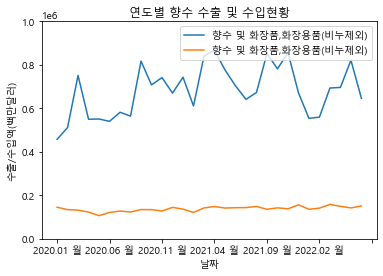

In [248]:
plt.figure(figsize=(20,10))
# plt.plot(data=money)
money.T.iloc[2:,:].plot()
plt.title('연도별 향수 수출 및 수입현황')
plt.xlabel('날짜')
plt.ylabel('수출/수입액(백만달러)')
plt.ylim(0,1000000)
plt.legend(loc='upper right')

In [250]:
m = money.transpose()
index = m.index[2:]
m = m.loc[index]
m.columns = ["export", "import"]
m

,export,import
2020.01 월,457396,145211
2020.02 월,511342,134051
2020.03 월,751075,131773
2020.04 월,549864,122813
2020.05 월,550866,106444
2020.06 월,540095,121283
2020.07 월,581815,127440
2020.08 월,564114,123310
2020.09 월,817107,134287
2020.10 월,707818,134055


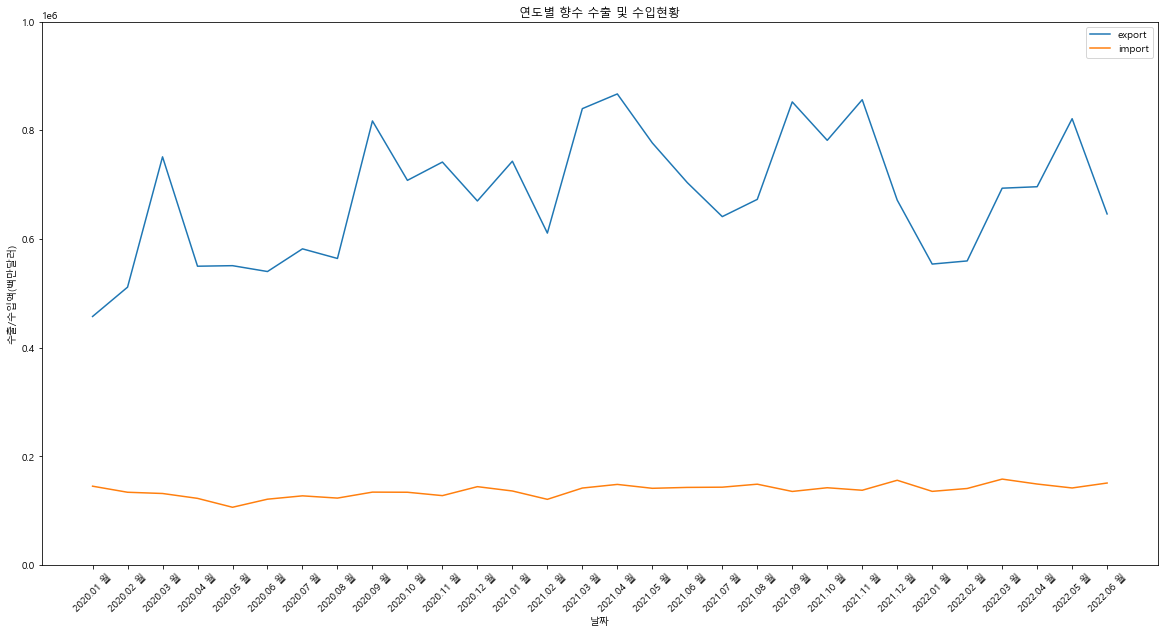

<Figure size 432x288 with 0 Axes>

In [275]:
plt.figure(figsize=(20,10))
plt.plot(m["export"],label='export')
plt.plot(m["import"],label='import')
plt.title('연도별 향수 수출 및 수입현황')
plt.xlabel('날짜')
plt.ylabel('수출/수입액(백만달러)')
plt.ylim(0,1000000)
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()
plt.savefig('향수_수출입.jpg',dpi=600)

In [90]:
review = pd.read_csv('리뷰작성날짜.csv',encoding='utf-8')
review.columns = ['인덱스','리뷰작성날짜']
review = review.drop(['인덱스'], axis=1)
review

,리뷰작성날짜
0,2022-07-27
1,2022-07-26
2,2022-05-29
3,2022-05-29
4,2022-05-17
...,...
2703,2021-10-25
2704,2021-10-24
2705,2021-10-18
2706,2021-10-16


In [91]:
review.value_counts()

리뷰작성날짜    
2020-06-19    14
2022-02-22    14
2020-11-04    12
2022-05-13    11
2022-05-18    11
              ..
2020-03-01     1
2021-12-30     1
2021-12-29     1
2021-12-28     1
2021-10-25     1
Length: 982, dtype: int64

In [96]:
count = pd.DataFrame(review.value_counts(),columns=['count'])
count

,count
리뷰작성날짜,
2020-06-19,14
2022-02-22,14
2020-11-04,12
2022-05-13,11
2022-05-18,11
...,...
2020-03-01,1
2021-12-30,1
2021-12-29,1


In [102]:
count = count.sort_index(ascending=True)
count

,count
리뷰작성날짜,
2018-10-04,2
2018-10-09,1
2018-10-26,1
2018-11-19,1
2018-11-22,1
...,...
2022-09-23,2
2022-09-24,3
2022-09-26,10


<AxesSubplot:xlabel='리뷰작성날짜'>

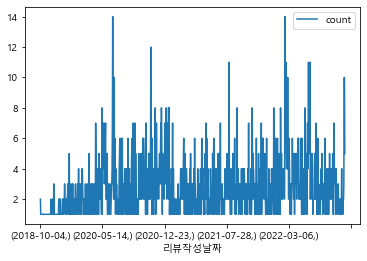

In [101]:
count.plot()